 ## Hopper Puzzle
 Hopper provided a dataset as a puzzle, so I thought to explore what the data can tell us.
 (Source: http://bit.ly/2q6U8dq)

In [19]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd

 ### Starting off; Imports, Data Exploration
 First we'll import the dataset (saved locally to the github for illustration), we could either open it up briefly in excel (if the file is small), or get python to show us a sample. Starting off on any data project, it's good practice to review what we've got, for completeness and to see what we're working with.

 Below I'll use panda's `.head()`, `.shape` and `.info()` to see what we're working with.

In [20]:
source = r"puzzle.xlsx"
df_puzzle = pd.read_excel(source,header=None)

df_puzzle.head()

,0,1
0,0.39715,2.113629
1,0.39715,2.113629
2,0.39715,2.113629
3,0.39715,2.113629
4,0.39715,2.113629


In [21]:
df_puzzle.shape

(1024, 2)

In [22]:
df_puzzle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 2 columns):
0    1024 non-null float64
1    1024 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB


 ### Initial Observations
 In summary, what we've got here is a 1024 point, two dimension dataset, no blanks, and no labels. Without labels, this tells me that we have no classification, so if we do any machine learning, we should use an unsupevised approach.

 Next, lets plot this to see what we're working with (what the data looks like).

<function matplotlib.pyplot.show(*args, **kw)>

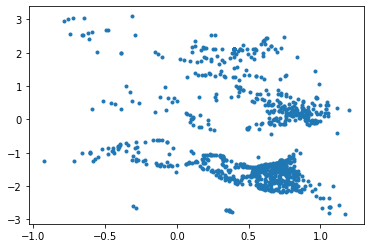

In [23]:
x = df_puzzle[0]
y = df_puzzle[1]

plt.plot(x, y,'.')
plt.show

 Cool. Looks like we have some clusters going on here. Since we have no labels, let use k-means for this example; k-means is an unsupervised approach of machine learning, we don't need test/training datasets or labels. I also choose k-means because initial plotting we seem to be seeing clusters. We could also apply regression if these are in fact non-discrete datapoints.

 Since we'll explore this by plotting, before we go into the deep end, lets see what we get for optimal number of clusters. I'll demonstrate using the average silouette method.

### Average Silouette
K-means is a simple algorithm to use, but it requires that the user decides what should be the number of clusters. Since eye-balling this isn't that efficient, we'll use a average silouette method to show us what different number of clusters evaluate to and their quality. Another method to find the ideal number of clusters is the elbow method, but we'll just use this one for demonstration.

Recall that in average silouette method, what a "good" cluster number looks like is:
* little to no number of clusters with silhouette coefficient < 0
    * 0 indicates that the cluster is close to a decision boundary, so it might actually be in the wrong cluster.
* little fluctuation between average of silhouette plots

Thickness of the silhouette plot will show us how big the cluster size is, and isn't necessarily indicative of the quality of the numbers of cluster, just of the data and likely density.

In the code below, we'll try this out with up to 6 clusters, and create subplots to interpret each.  
(Credits to https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html, so I don't have to retype it all).

For n_clusters = 2 The average silhouette_score is : 0.6556803332813503
For n_clusters = 3 The average silhouette_score is : 0.676165657282657
For n_clusters = 4 The average silhouette_score is : 0.5796609247217195
For n_clusters = 5 The average silhouette_score is : 0.5534823536126471
For n_clusters = 6 The average silhouette_score is : 0.5237395151138124


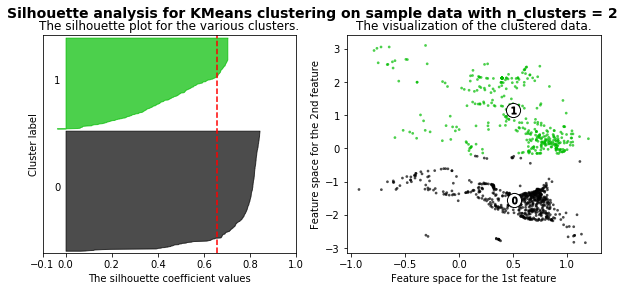

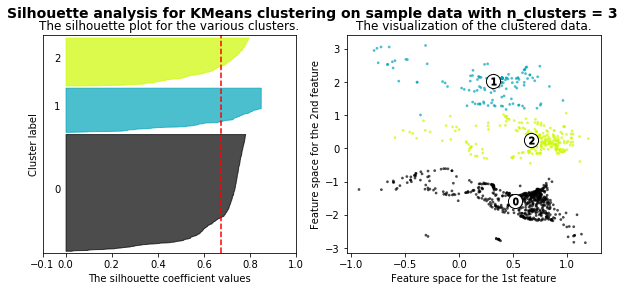

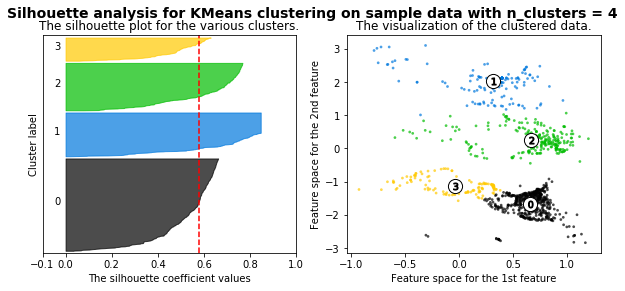

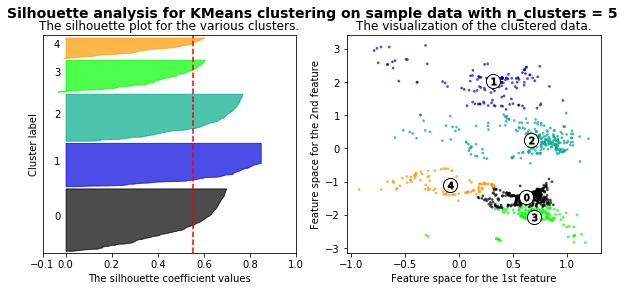

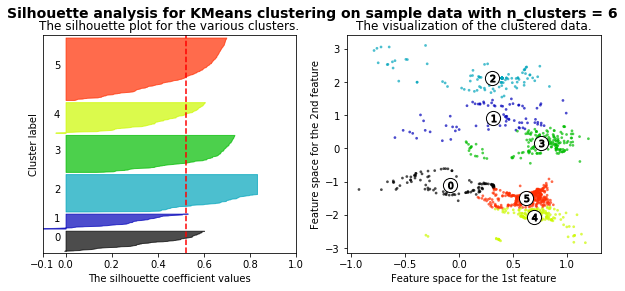

In [24]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_puzzle) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_puzzle)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_puzzle, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_puzzle, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_puzzle[0], df_puzzle[1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Interpreting the silhouette analysis
* the highest average silhoutette score is with n_clusters = 3 (red line)
* the silhouette plots suggests that `n_clusters` 2, 5 and 6 are not good choices
    * we see that there are clusters with silhouette coefficient values less than 0
    * there are also presence of clusters with close to and below average score (red line)

* the analysis suggests we could use either `n_clusters` 3 or 4.


Between `n_clusters` 3 and 4 we also see that cluster 0 has the thickest silhouette, therefore meaning it's quite dense. The silhouette analysis is more inclined to favour n_clusters = 3, with the fewer variations fromt he average.

Lets just replot both `n_clusters` = 3, and 4 for demonstration.

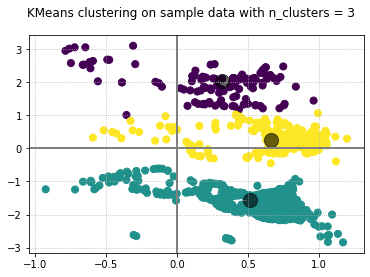

In [25]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(df_puzzle)
y_kmeans = kmeans.predict(df_puzzle)

#Plot the scatter plot
plt.scatter(df_puzzle[0],df_puzzle[1],c=y_kmeans,s=50,cmap='viridis')
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters))
plt.grid(True,linestyle=":")
plt.axhline(0,linewidth=2,color='grey')
plt.axvline(0,linewidth=2,color='grey')

#Plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.6)


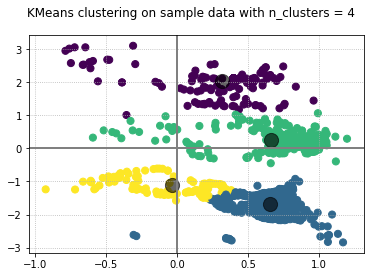

In [26]:
n_clusters = 4
kmeans = KMeans(n_clusters).fit(df_puzzle)
y_kmeans = kmeans.predict(df_puzzle)

#Plot the scatter plot
plt.scatter(df_puzzle[0],df_puzzle[1],c=y_kmeans,s=50,cmap='viridis')
plt.suptitle(("KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters))
plt.grid(True,linestyle=":")
plt.axhline(0,linewidth=2,color='grey')
plt.axvline(0,linewidth=2,color='grey')

#Plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],centers[:, 1],c='black',s=200,alpha=0.6)


 ## Conclusion
And there we have it. `n` number of clusters plotted from a dataset. In any analysis, next step would be to interpret the results found here and combine it with business domain knowledge, in order to refine the analysis and find actions for what to do with the data.

There's also noticeably a long tail of outliers from the clusters, so perhaps another method would've suited this better. Nevertheless, without knowledge of the data labels, the interpretation could go in a million (not-so-useful) directions. So knowing a little more of the basis of this data could go a long way in choosing the right method to interpreting, analysing and experimenting with the data.

Thanks @hopper for providing the data.